In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay 
from sklearn.linear_model import SGDClassifier

In [5]:
X,Y = datasets.load_iris(return_X_y=True)
X = X[:, :2] # only 2 features
X[:10], Y[:10], Y.shape

(array([[5.1, 3.5],
        [4.9, 3. ],
        [4.7, 3.2],
        [4.6, 3.1],
        [5. , 3.6],
        [5.4, 3.9],
        [4.6, 3.4],
        [5. , 3.4],
        [4.4, 2.9],
        [4.9, 3.1]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 (150,))

In [6]:
tmp = np.arange(Y.shape[0])
np.random.seed()
np.random.shuffle(tmp)
tmp[:10], X[:10], X[tmp][:10]

(array([127,  92,  23,  34,  59,  19, 142, 123,  25,  48]),
 array([[5.1, 3.5],
        [4.9, 3. ],
        [4.7, 3.2],
        [4.6, 3.1],
        [5. , 3.6],
        [5.4, 3.9],
        [4.6, 3.4],
        [5. , 3.4],
        [4.4, 2.9],
        [4.9, 3.1]]),
 array([[6.1, 3. ],
        [5.8, 2.6],
        [5.1, 3.3],
        [4.9, 3.1],
        [5.2, 2.7],
        [5.1, 3.8],
        [5.8, 2.7],
        [6.3, 2.7],
        [5. , 3. ],
        [5.3, 3.7]]))

In [7]:
mean, std = X.mean(), X.std()


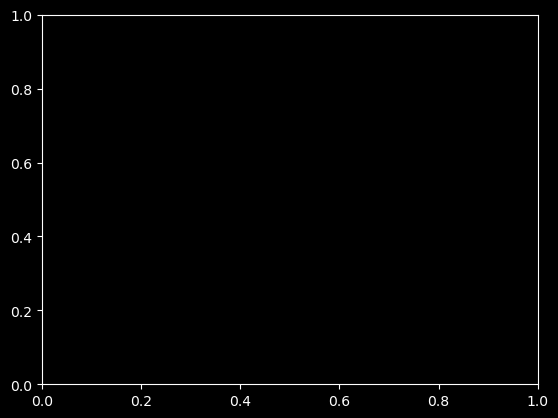

In [8]:
clf = SGDClassifier(alpha=0.001, max_iter=100).fit(X, Y)
ax = plt.gca()

/var/folders/_2/y461zwnj1zvg7rpcqwc9zm640000gn/T/ipykernel_83781/655203365.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


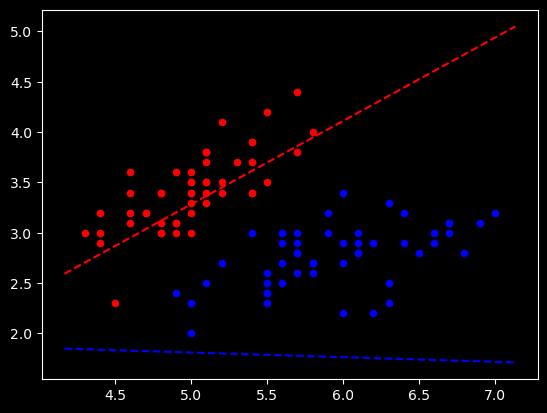

In [19]:
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    xlabel="feature 1",
    ylabel="feature 2",
)

colors = ["red", "blue"]

# Plot also the training points (as scatter)
for i, color in zip(clf.classes_, colors): 
    idx = np.where(Y == i)
    plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=f"target{i}",
            cmap=plt.cm.Paired,
            # edgecolor="black",
    s=20, )

# hyperplane
xmin, xmax = plt.xlim()
# ymin, ymax = plt.ylim()
coef, intercept = clf.coef_, clf.intercept_

def plot_hyperplane(c, color): 
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1] 
    plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)


for i, color in zip(clf.classes_, colors): 
    plot_hyperplane(i, color)
plt.show()